In [1]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00


In [2]:
# Quantum Phase Estimation (QPE) using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

def qpe_circuit(num_count_qubits, unitary, theta):
    """
    Constructs the Quantum Phase Estimation (QPE) circuit.
    num_count_qubits: number of counting qubits
    unitary: unitary gate (to apply controlled operations)
    theta: phase parameter (for U gate)
    """
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)

    # Step 1: Apply Hadamard gates on counting qubits
    qc.h(range(num_count_qubits))

    # Step 2: Prepare eigenstate (|1>) for the target qubit
    qc.x(num_count_qubits)

    # Step 3: Apply controlled unitary operations
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

    # Step 4: Apply inverse QFT to counting qubits
    inverse_qft(qc, num_count_qubits)

    # Step 5: Measure counting qubits
    qc.measure(range(num_count_qubits), range(num_count_qubits))

    return qc

In [3]:
def inverse_qft(qc, n):
    """Apply the inverse Quantum Fourier Transform on n qubits."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

In [4]:
def run_qpe(num_count_qubits=3, theta=0.125):
    """Executes the QPE circuit and visualizes the phase estimation result."""
    simulator = AerSimulator()
    qc = qpe_circuit(num_count_qubits, "U", theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()
    print(qc.draw(output='text'))

In [5]:
if __name__ == "__main__":
    num_count_qubits = 3
    theta = 0.125  # phase value (1/8)
    print(f"Running Quantum Phase Estimation with {num_count_qubits} counting qubits and phase {theta}")
    run_qpe(num_count_qubits, theta)

Running Quantum Phase Estimation with 3 counting qubits and phase 0.125
     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐           
«q_0: ┤M├───────────
«     

In [5]:
TASKS

🎯 Task 1: Change the Phase Value — try different theta values

Running QPE with θ = 0.25
     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────


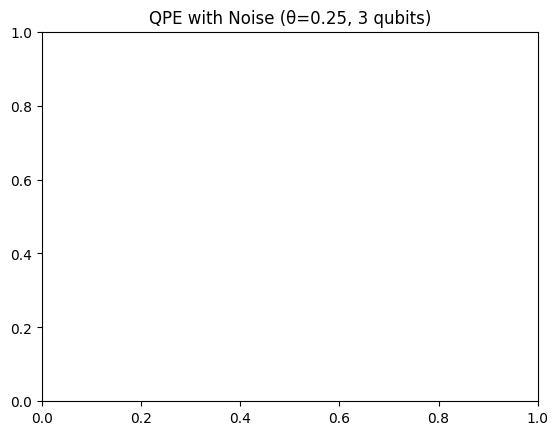

     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─╫─┤M├
«    

In [6]:
# ============================
# 🧠 STUDENT PRACTICE TASKS
# ============================

from qiskit_aer import noise
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# Helper: calculate expected theoretical binary value
def theoretical_phase(num_count_qubits, theta):
    """Return the theoretical binary string representing the phase."""
    expected_value = int(theta * (2 ** num_count_qubits))
    expected_binary = format(expected_value, f'0{num_count_qubits}b')
    print(f"\n🧮 Expected binary (theoretical): {expected_binary}")
    print(f"Expected phase ≈ {theta}\n")

# -----------------------------
# 🎯 Task 1: Change the Phase Value
# -----------------------------
print("🎯 Task 1: Change the Phase Value — try different theta values")

# Example: θ = 0.25, 0.375, 0.5
for theta in [0.25, 0.375, 0.5]:
    print(f"\nRunning QPE with θ = {theta}")
    run_qpe(num_count_qubits=3, theta=theta)
    theoretical_phase(3, theta)

# -----------------------------
# 🎯 Task 2: Increase the Number of Counting Qubits
# -----------------------------
print("🎯 Task 2: Increase the Number of Counting Qubits")

# Example: use 4 and 5 qubits
for qubits in [4, 5]:
    print(f"\nRunning QPE with {qubits} counting qubits and θ = 0.125")
    run_qpe(num_count_qubits=qubits, theta=0.125)
    theoretical_phase(qubits, 0.125)

# -----------------------------
# 🎯 Task 3: Compare with Theoretical Output
# -----------------------------
print("🎯 Task 3: Compare with Theoretical Output")

# Compare measured histogram with theoretical phase
theta = 0.375
num_qubits = 4
print(f"\nComparing simulation and theory for θ = {theta}")
run_qpe(num_count_qubits=num_qubits, theta=theta)
theoretical_phase(num_qubits, theta)

# -----------------------------
# 🎯 Task 4: Inverse QFT Visualization
# -----------------------------
print("🎯 Task 4: Visualize the Inverse QFT section")

try:
    qc_viz = qpe_circuit(3, "U", 0.25)
    qc_viz.draw(output='mpl')
    plt.title("Inverse QFT Visualization inside QPE")
    plt.show()
except Exception:
    print(qpe_circuit(3, "U", 0.25).draw(output='text'))

# -----------------------------
# 🎯 Task 5: Noise Simulation
# -----------------------------
print("🎯 Task 5: Introduce Noise and Observe Effects")

def run_qpe_with_noise(num_count_qubits=3, theta=0.25):
    """Runs QPE with a simple depolarizing noise model."""
    # Create noise model
    error1 = noise.depolarizing_error(0.02, 1)
    error2 = noise.depolarizing_error(0.04, 2)
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error1, ['h', 'x'])
    noise_model.add_all_qubit_quantum_error(error2, ['cp'])

    # Simulate with noise
    simulator = AerSimulator(noise_model=noise_model)
    qc = qpe_circuit(num_count_qubits, "U", theta)
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=2048).result()
    counts = result.get_counts()


    plot_histogram(counts)
    plt.title(f"QPE with Noise (θ={theta}, {num_count_qubits} qubits)")
    plt.show()
    print(qc.draw(output='text'))
    theoretical_phase(num_count_qubits, theta)

# Example: Run with noise
run_qpe_with_noise(3, 0.25)

print("\n✅ All student practice tasks completed successfully!")

